In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
tr_df = pd.read_csv('/Users/treychase/Downloads/mlb_bat_tracking_2024.csv')
#loading data

In [3]:
tr_df.head()

,"last_name, first_name",player_id,year,on_base_plus_slg,avg_swing_speed,fast_swing_rate,squared_up_contact,avg_swing_length,exit_velocity_avg
0,"Ohtani, Shohei",660271,2024,1.024,75.4,55.3,40.4,7.6,94.8
1,"Springer III, George",543807,2024,0.537,71.2,14.8,33.0,7.3,86.5
2,"Varsho, Daulton",662139,2024,0.750,73.2,29.3,22.6,7.7,85.7
3,"Greene, Riley",682985,2024,0.762,74.4,44.1,34.5,7.2,91.4
4,"Arozarena, Randy",668227,2024,0.566,72.8,35.6,34.7,7.4,90.8


In [4]:
tr_df.columns
#quick glance to look at columns, see if any names need to be changed

Index(['last_name, first_name', 'player_id', 'year', 'on_base_plus_slg',
       'avg_swing_speed', 'fast_swing_rate', 'squared_up_contact',
       'avg_swing_length', 'exit_velocity_avg'],
      dtype='object')

In [5]:
tr_df = tr_df.drop(['player_id'], axis=1)
#dropping player_id (unecessary)

In [6]:
tr_df.dtypes
#checking data types

last_name, first_name     object
year                       int64
on_base_plus_slg         float64
avg_swing_speed          float64
fast_swing_rate          float64
squared_up_contact       float64
avg_swing_length         float64
exit_velocity_avg        float64
dtype: object

In [7]:
tr_df[['last', 'first']] = tr_df['last_name, first_name'].str.split(', ', expand=True)
#splitting this column into two to make it readable

In [8]:
tr_df = tr_df.drop('last_name, first_name', axis=1)
#after split, deleting the original column

In [9]:
tr_df.duplicated().sum()
#checking for duplicated rows, everything looks good

0

In [31]:
tr_df['ops'] = tr_df['on_base_plus_slg']
tr_df = tr_df.drop('on_base_plus_slg', axis=1)
#changing the name to a more concise and recognizable one

In [11]:
tr_df.describe()
#taking a look at the general metrics of each variable

,year,on_base_plus_slg,avg_swing_speed,fast_swing_rate,squared_up_contact,avg_swing_length,exit_velocity_avg,ops
count,152.0,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,2024.0,0.740066,71.686842,24.543421,33.871053,7.361184,89.505921,0.740066
std,0.0,0.107178,2.745175,19.872413,4.839594,0.401330,2.552268,0.107178
min,2024.0,0.479000,62.300000,0.000000,22.300000,5.900000,83.200000,0.479000
25%,2024.0,0.664000,69.775000,8.050000,30.400000,7.175000,87.650000,0.664000
50%,2024.0,0.743500,71.550000,17.800000,33.700000,7.400000,89.450000,0.743500
75%,2024.0,0.796250,73.525000,36.700000,36.950000,7.600000,91.125000,0.796250
max,2024.0,1.039000,80.600000,97.700000,48.900000,8.600000,96.900000,1.039000


In [12]:
import statistics

In [26]:
m = statistics.mean(tr_df['avg_swing_speed'])
sd = statistics.stdev(tr_df['avg_swing_speed'])

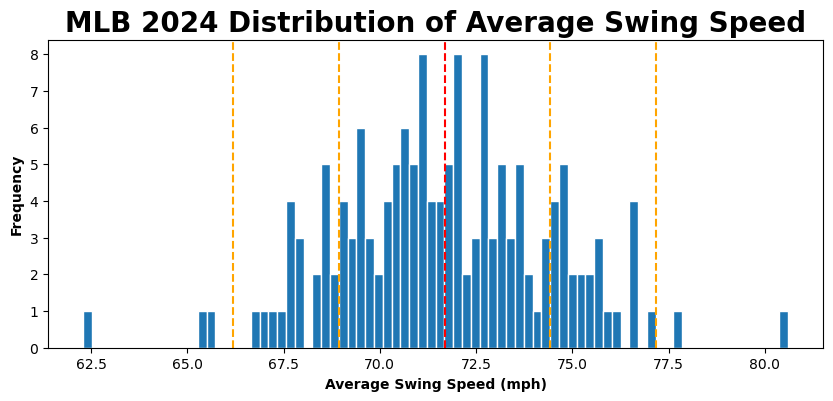

In [27]:
fig, ax = plt.subplots(figsize = (10, 4))

ax.hist(tr_df['avg_swing_speed'], bins = 80, edgecolor = "White")

plt.axvline(m, color = 'Red', linestyle = 'dashed', label = "Mean")
plt.axvline(m + sd, color = 'Orange', linestyle = 'dashed')
plt.axvline(m - sd, color = 'Orange', linestyle = 'dashed')
plt.axvline(m + 2*sd, color = 'Orange', linestyle = 'dashed')
plt.axvline(m - 2*sd, color = 'Orange', linestyle = 'dashed')
#showing the lines of the mean and interquartile range to get a general idea of where most of the average swing speed values fall

plt.xlabel("Average Swing Speed (mph)", fontsize = 10, weight = "bold")
plt.ylabel("Frequency", weight = "bold")
plt.title("MLB 2024 Distribution of Average Swing Speed", fontsize = 20, weight = "bold")

plt.show()

The distribution of average swing speed in the MLB is roughly normally distributed an average of 71.69 mph, with most hitters concentrated between 66 and 77.5 mph. The bulk of batters are only about a 5 mph difference at most from the mean, so most players are swinging the bat at around the same speed. Thus, I don't expect there to be large correlation between swing speed and ops since there is little variance. 

In [15]:
m = statistics.mean(tr_df['avg_swing_length'])
sd = statistics.stdev(tr_df['avg_swing_length']) 

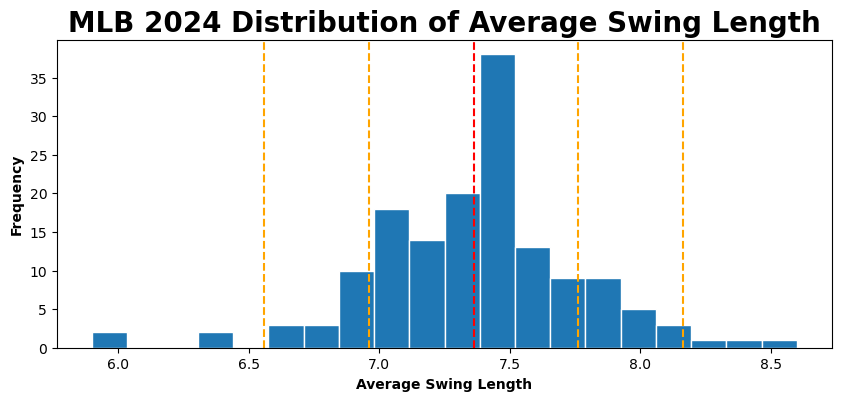

In [16]:
fig, ax = plt.subplots(figsize = (10, 4))

ax.hist(tr_df['avg_swing_length'], bins = 20, edgecolor = "White")

plt.axvline(m, color = 'Red', linestyle = 'dashed', label = "Mean")
plt.axvline(m + sd, color = 'Orange', linestyle = 'dashed')
plt.axvline(m - sd, color = 'Orange', linestyle = 'dashed')
plt.axvline(m + 2*sd, color = 'Orange', linestyle = 'dashed')
plt.axvline(m - 2*sd, color = 'Orange', linestyle = 'dashed')
#showing the lines of the mean and interquartile range to get a general idea of where most of the RE24 values fall

plt.xlabel("Average Swing Length", fontsize = 10, weight = "bold")
plt.ylabel("Frequency", weight = "bold")
plt.title("MLB 2024 Distribution of Average Swing Length", fontsize = 20, weight = "bold")

plt.show()

Looking at swing length, the distribution is slightly skewed to the right, with a mean swing length of 7.36 feet. Again, the variance is not large, with the majority of hitters within the 6.5 to 8.1 range. Since bat speed is primarily the generator of power in a swing, I would expect more of a correlation between ops/exit velocity and bat speed as opposed to swing length. Players with long swings can still swing the bat fast, they may just have a taller frame and thus have a longer path to the ball than others. 

For example, Jorge Soler of the San Francisco Giants has a bat speed in the 95th percentile according to Statcast (75.6 mph), but an average swing length of 8.0 feet, which is a statistical outlier. He is 6'4 and 235 pounds, so the imposing power hitter generates impressive torque on his swing, but also has to take a longer path to the ball.

In [32]:
tr_df[tr_df['last'] == 'Soler']

,year,avg_swing_speed,fast_swing_rate,squared_up_contact,avg_swing_length,exit_velocity_avg,last,first,ops
73,2024,75.6,61.4,26.4,8.0,89.4,Soler,Jorge,0.688


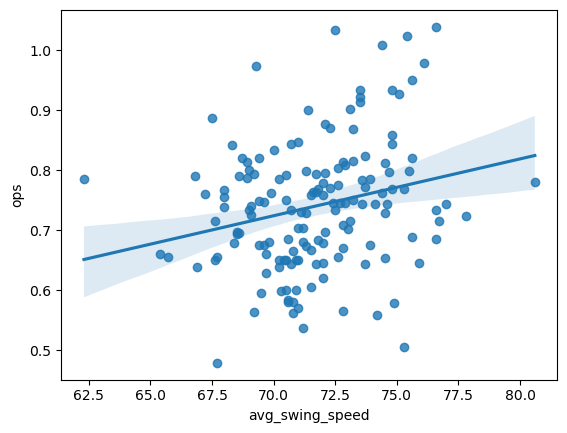

In [17]:
ax = sns.regplot(data = tr_df, x = 'avg_swing_speed', y = 'ops')

We can generate some visuals and calculations to verify this claim.

In [18]:
print(tr_df['avg_swing_speed'].corr(tr_df['ops']))

0.24258248397820814


From the scatter plot, the fitted line indicates that there is little to no positive correlation between average swing speed and ops. This is somewhat surprising, since faster swings generate higher exit velocities, which increases hit probability and power. However, the variance in swing speeds was so low that it doesn't make a significant difference. Everyone is swinging around the same speed on average, so it wouldn't be primarily responsible for the disparity in ops in the league.

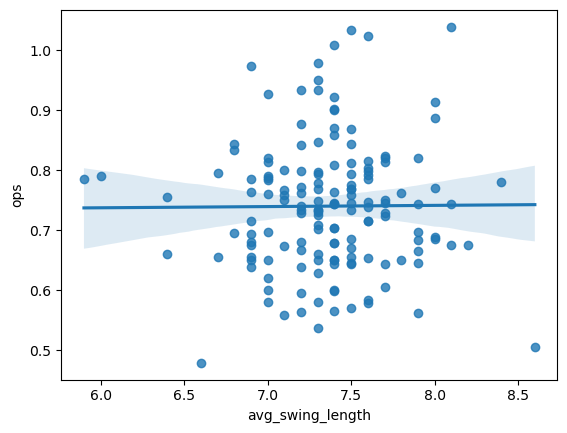

In [19]:
ax = sns.regplot(data = tr_df, x = 'avg_swing_length', y = 'ops')

In [20]:
print(tr_df['avg_swing_length'].corr(tr_df['ops']))

0.007526962419208253


Average swing length has even less of a correlation to ops than swing speed. In fact, there is essentially no correlation at all. This verifies my claim from earlier that swing length is more dependent on a player's physical traits rather than their ability to produce at the plate. 

Perhaps there is more of association between bat tracking metrics and exit velocity.

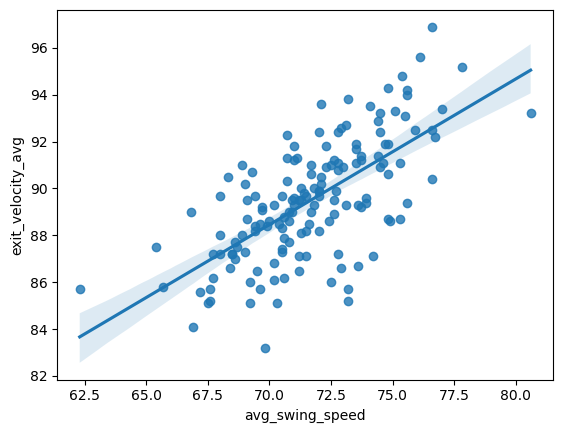

In [21]:
ax = sns.regplot(data = tr_df, x = 'avg_swing_speed', y = 'exit_velocity_avg')

In [22]:
print(tr_df['avg_swing_speed'].corr(tr_df['exit_velocity_avg']))

0.6689529181016357


Lo and behold, there does appear to be a positive linear association between average swing speed and average exit velocity. The relationship is intuitive, as the harder someone swings, the harder they will hit the ball if they square it up. There is a strong association with average exit velocity and ops, but not with average swing speed and ops, so the transitive property does not hold here. Again, the relationship is explained by the small variance in the distribution of swing speeds across MLB. 

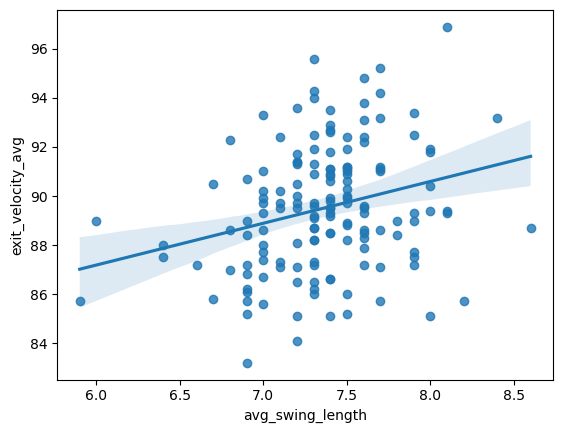

In [23]:
ax = sns.regplot(data = tr_df, x = 'avg_swing_length', y = 'exit_velocity_avg')

In [33]:
print('Correlation between average swing length and average exit velocity:', tr_df['avg_swing_length'].corr(tr_df['exit_velocity_avg']))

Correlation between average swing length and average exit velocity: 0.2679576446270197


Just to verify, I constructed a visual and correlation calculation on average swing length vs. average exit veloctity. Again, I justify my claim that there is no relation between average swing length and average exit velocity. 

To summarize, there is a little correlation between average swing speed and ops, and no correlation between average swing length and ops. For average swing speed, this can be attributed to the fact that the overall distribution of average swing speeds has little variance. If everyone is swinging at around the same speed, the miniscule differences cannot explain the wide variation in ops. With average swing length, the variance in the distribution stems from the physical traits in players, where taller players swing longer and shorter players swing shorter on average. A tall, muscular player like Jorge Soler or Aaron Judge generates a quick swing but also a long one, and they still tend to produce high ops values. More analysis is possible with the new bat tracking data, but it is safe to say that they do not have much of an effect on ops, the most accurate metric of production for a batter in today's MLB.